In [0]:
import pandas as pd

In [0]:
loan = pd.read_csv("https://raw.githubusercontent.com/abshk211/Datasets/master/Loan_train.csv")

In [278]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [279]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [265]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [266]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d0f81f320>,
      dtype=object)

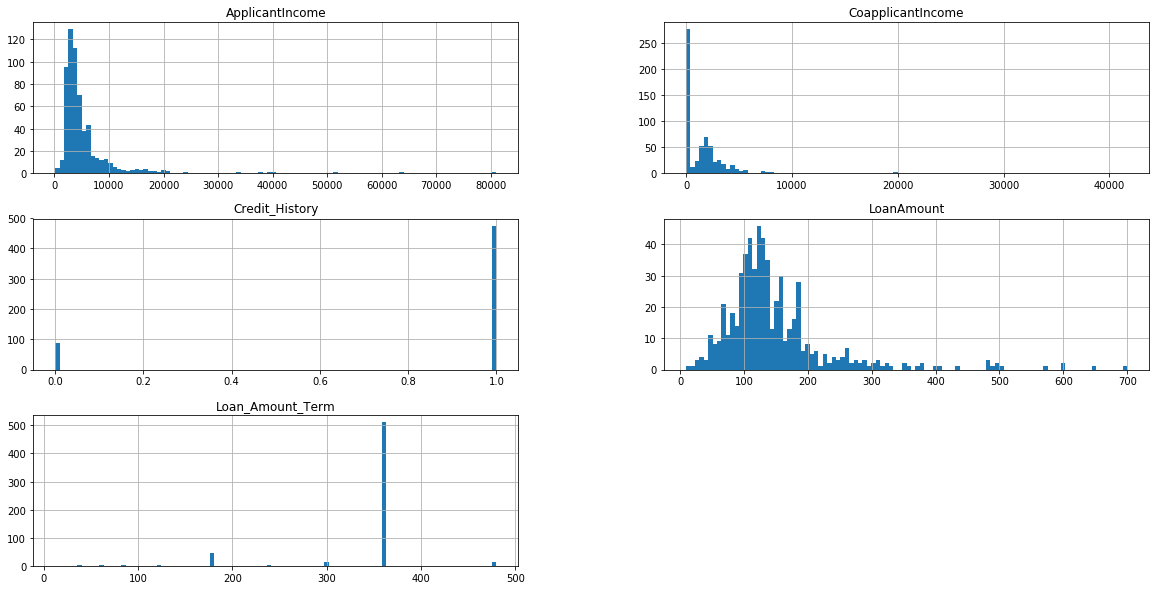

In [267]:
loan.hist(bins=100,figsize = (20,10))

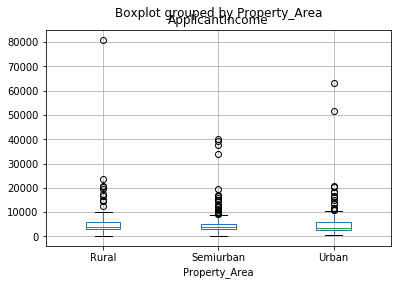

In [268]:
loan.boxplot(column = "ApplicantIncome" , by="Property_Area")

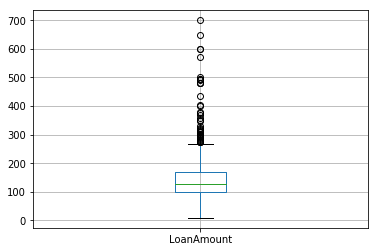

In [269]:
loan.boxplot(column = "LoanAmount")

In [270]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
from scipy.stats import mode

In [0]:
loan['Gender'] = loan['Gender'].fillna(mode(loan['Gender']).mode[0])

In [0]:
loan['Married'] = loan['Married'].fillna(mode(loan['Married']).mode[0])

In [0]:
loan['Self_Employed'] = loan['Self_Employed'].fillna(mode(loan['Self_Employed']).mode[0])

In [0]:
import numpy as np
from fancyimpute import KNN

In [0]:
loan['LoanAmount'] = pd.DataFrame(KNN(k=3).fit_transform(loan['LoanAmount'].values.reshape(-1,1)))
loan['Loan_Amount_Term'] = pd.DataFrame(KNN(k=3).fit_transform(loan['Loan_Amount_Term'].values.reshape(-1,1)))
loan['Credit_History'] = pd.DataFrame(KNN(k=3).fit_transform(loan['Credit_History'].values.reshape(-1,1)))

In [0]:
loan['LoanAmount_log'] = np.log(loan['LoanAmount'])
#loan['LoanAmount_log'].hist(bins=100)
loan['TotalIncome'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
loan['TotalIncome_log'] = np.log(loan['TotalIncome'])
#loan['LoanAmount_log'].hist(bins=20) 

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [0]:
train = loan
loan = pd.read_csv('https://raw.githubusercontent.com/abshk211/Datasets/master/Loan_test.csv')

In [0]:
test = loan

In [0]:
train_label = train['Loan_Status']

In [0]:
del train['Loan_Status']

In [0]:
test = pd.get_dummies(test)
train = pd.get_dummies(train)

In [0]:
train.dropna()

In [0]:
train.reset_index()

In [0]:
model = LogisticRegression()

In [290]:
model.fit(train,train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored

In [0]:
predictions = model.predict(test)

In [0]:
test.head(2)